In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
import pathlib
import sys

In [5]:
HOME = pathlib.Path.home()
CWD = pathlib.Path.cwd()

### import the local package 

In [6]:
sys.path.append("../../")

In [7]:
import numpy as np
import pandas as pd
from cartopy import crs as ccrs

In [8]:
from ICU_Water_Watch import GPM, geo, plot, utils

### first step, we update the local GPM-IMERG dataset on disk, which is in by default `/home/nicolasf/operational/ICU/ops/data/GPM_IMERG/daily/extended_SP`

### parameters for papermill 

In [9]:
ndays = 90  # accumulation period (days)
lag = 2  # lag to realtime (days)
dpath_realtime = "/media/nicolasf/END19101/data/GPM_IMERG/daily/extended_SP/"
fig_path = HOME.joinpath(
    "operational/ICU/development/hotspots/code/ICU_Water_Watch/figures/virtual_stations"
)
virtual_stations_csv_path = '.'
virtual_stations_filename = 'virtual_stations.csv'

In [10]:
# Parameters
ndays = 360


In [11]:
dpath_realtime  = pathlib.Path(dpath_realtime)
fig_path = pathlib.Path(fig_path)
virtual_stations_csv_path = pathlib.Path(virtual_stations_csv_path)

In [12]:
dpath_climatology = dpath_realtime.joinpath("CLIMATOLOGY")

In [13]:
fig_path.mkdir(exist_ok=True)

In [14]:
lfiles = GPM.get_files_list(dpath=dpath_realtime, ndays=ndays, lag=lag)

In [15]:
if len(lfiles) != ndays: 
    print(f"The number of daily files is {len(lfiles)}, while the number of days is {ndays}")

In [16]:
dset = GPM.make_dataset(lfiles, ndays=ndays)

In [17]:
dset.dims

Frozen({'time': 360, 'lat': 300, 'lon': 460})

In [18]:
dset.data_vars

Data variables:
    precipitationCal  (time, lat, lon) float64 dask.array<chunksize=(1, 300, 460), meta=np.ndarray>

### get the last date and the number of days in the dataset, which are created automatically as global attributes in the dataset 

In [19]:
last_date, ndays_dset = GPM.get_attrs(dset)

In [20]:
last_date

datetime.datetime(2022, 8, 23, 0, 0)

### stations to extract 

In [21]:
stations_to_extract = pd.read_csv(virtual_stations_csv_path.joinpath(virtual_stations_filename), index_col=0)

In [22]:
stations_to_extract

,station_name,station_lat,station_lon
0,Nanumea,-5.661400,176.103600
1,Nanumaga,-6.285800,176.319900
2,Niutao,-6.106400,177.343800
3,Banaba,-0.857052,169.538569
4,Kuria Island,0.212635,173.428428
5,Aranuka Island,0.189632,173.634765
6,Tabiauea,0.922413,173.027021
7,Tarawa,1.443722,172.985565
8,Abaiang,1.850733,172.928745
9,Marakei Island,2.000318,173.276716


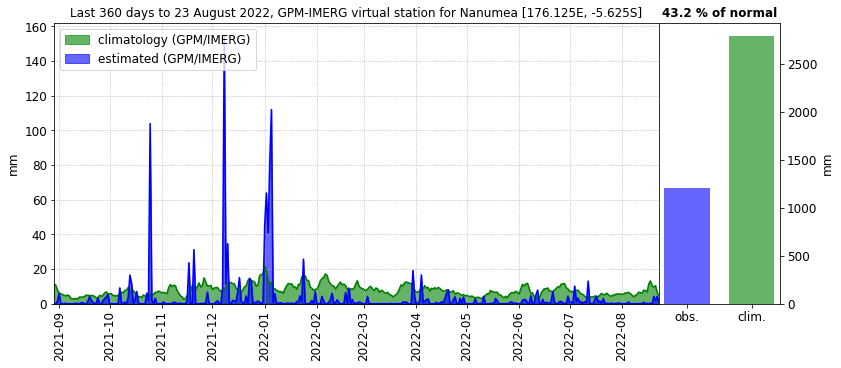

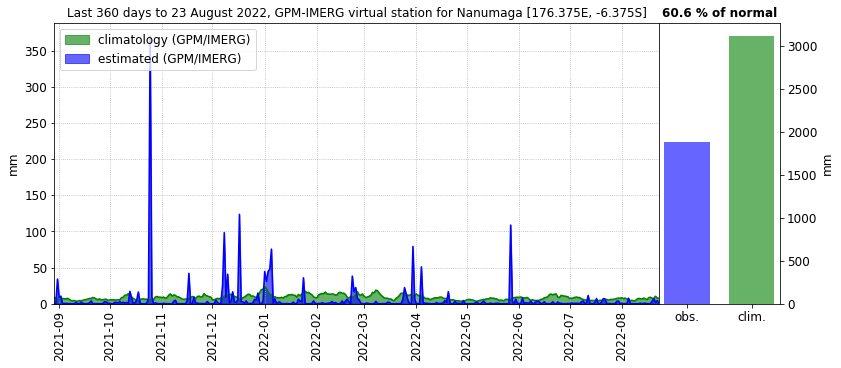

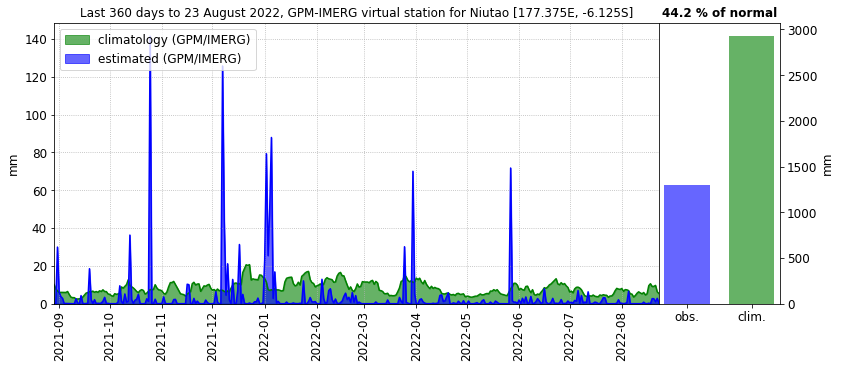

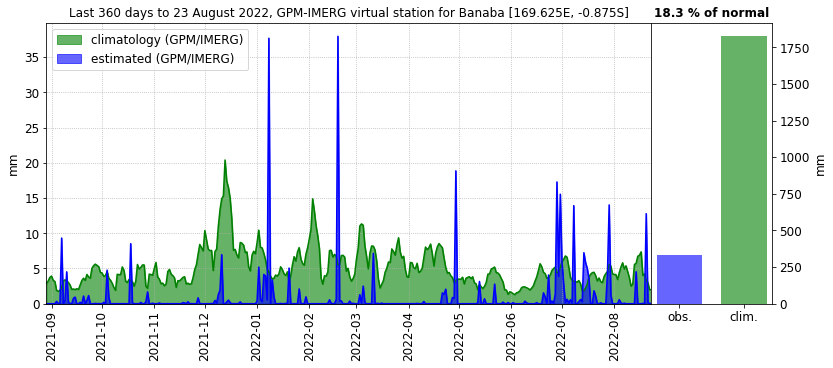

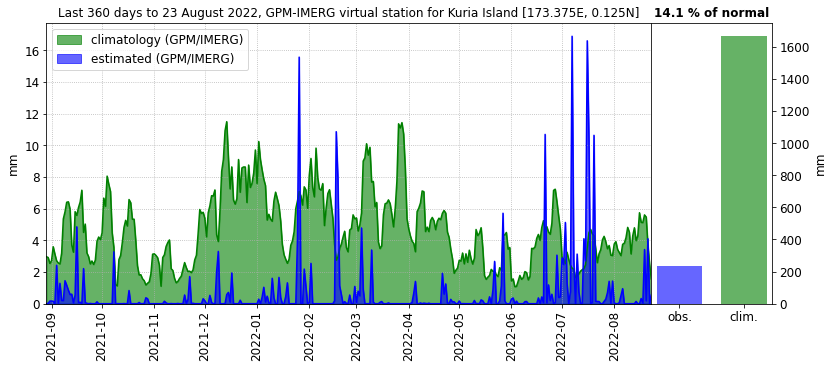

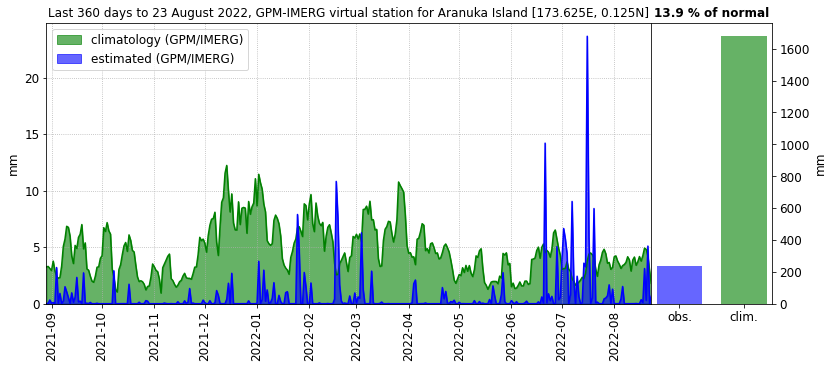

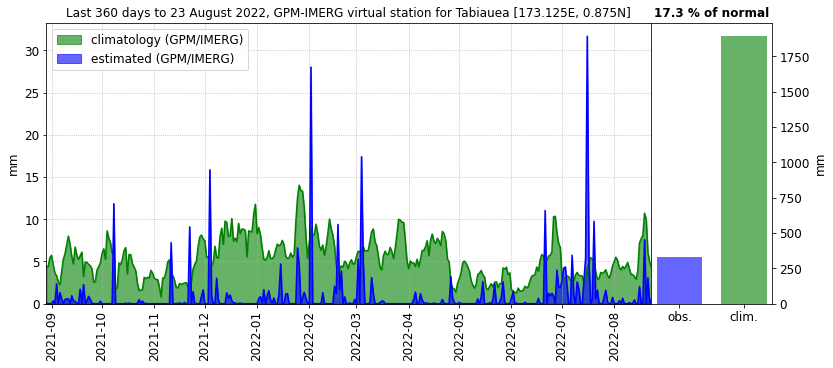

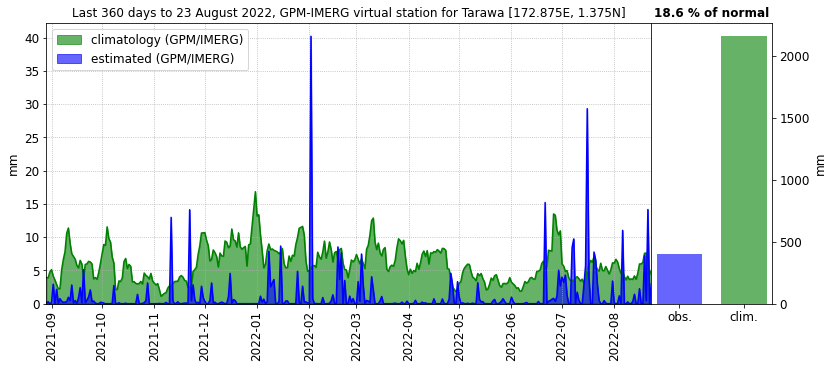

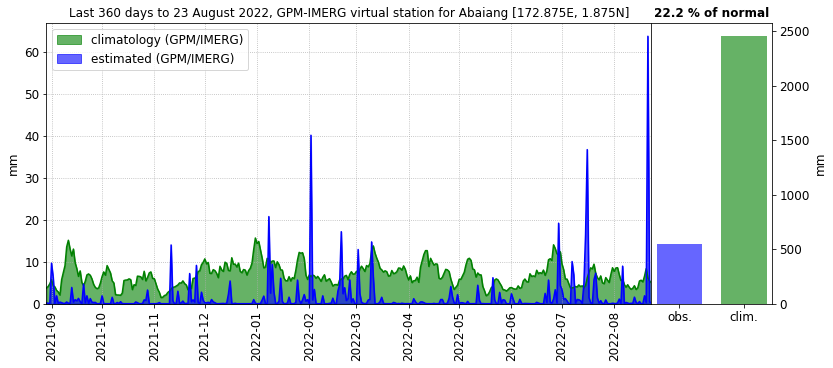

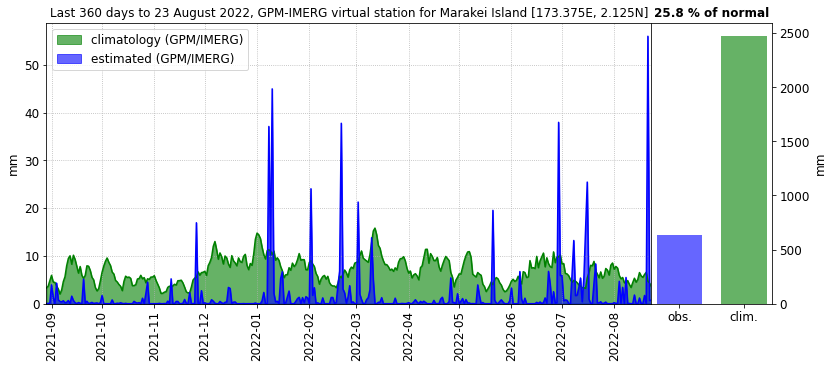

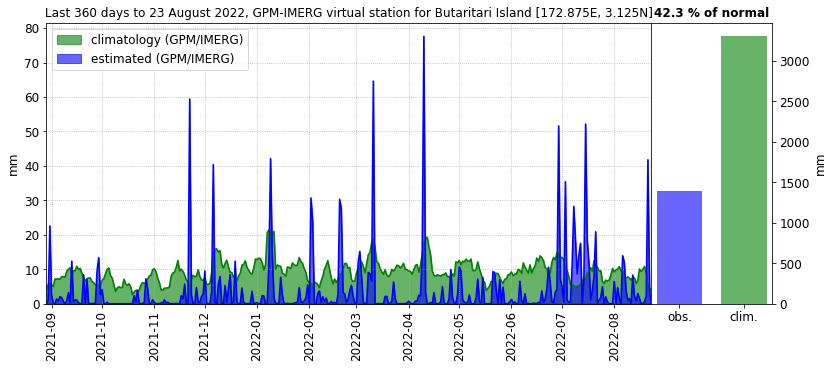

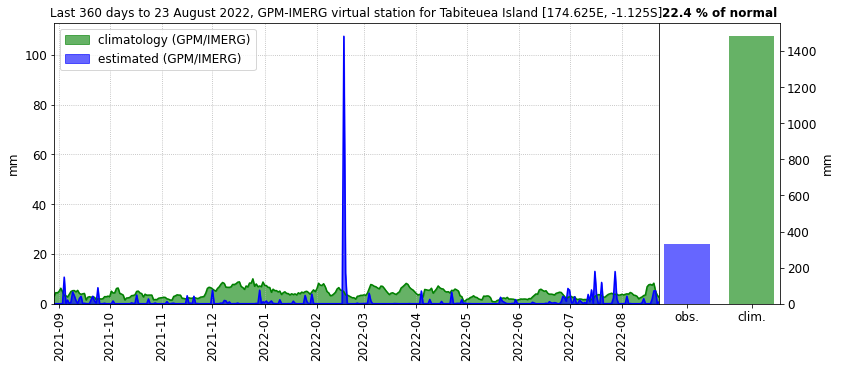

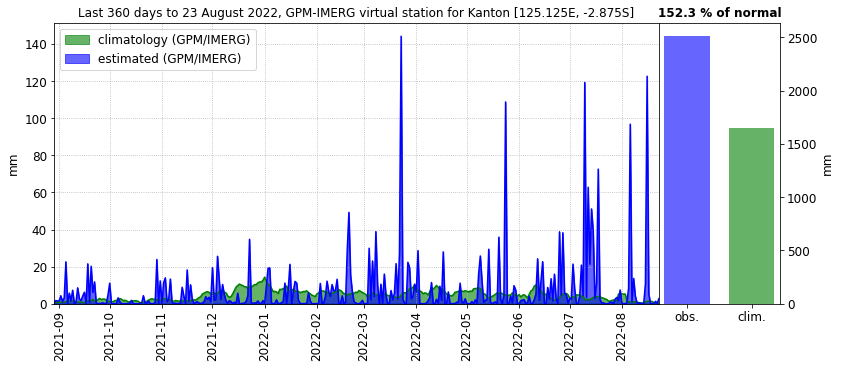

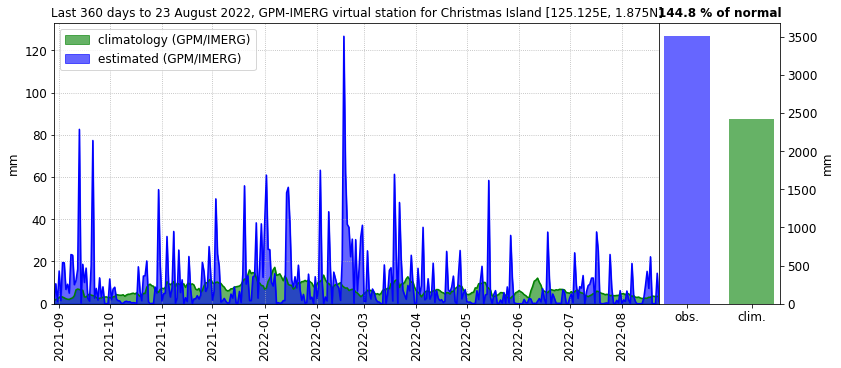

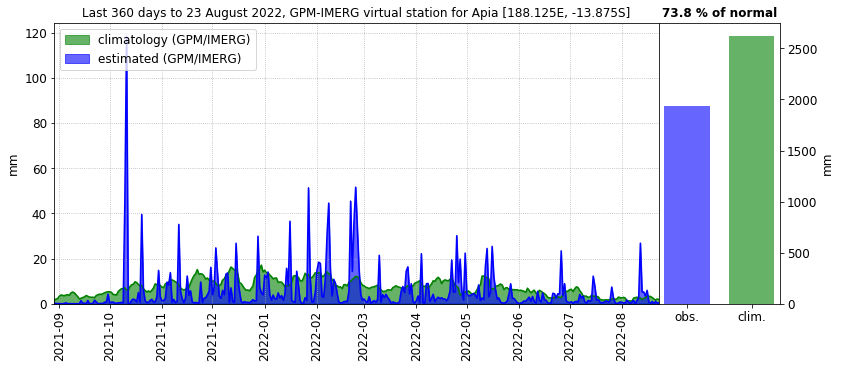

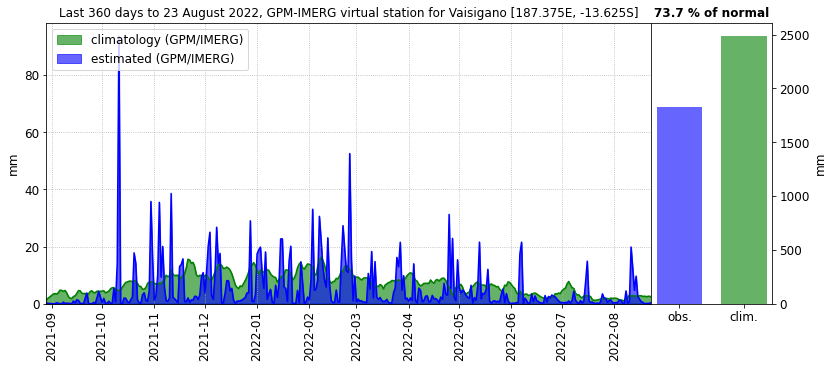

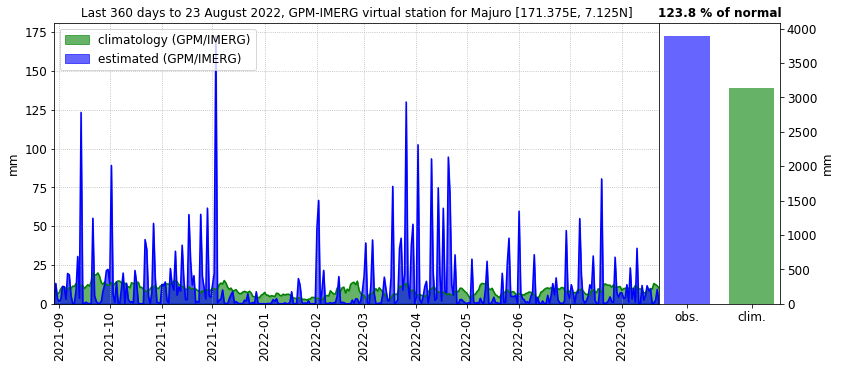

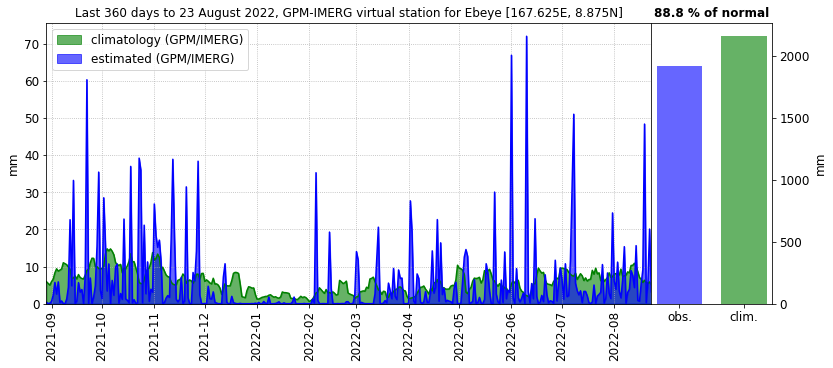

In [23]:
for i, row in stations_to_extract.iterrows():

    station_name = row.station_name
    station_lat = row.station_lat
    station_lon = row.station_lon

    df, extracted_coords, dist = GPM.get_virtual_station(
        dset, lat=station_lat, lon=station_lon
    )

    clim = GPM.get_virtual_station_climatology(
        dpath=dpath_climatology, lat=station_lat, lon=station_lon
    )

    df = GPM.join_clim(df, clim)

    f = plot.plot_virtual_station(
        df, station_name=station_name, lon=extracted_coords[0], lat=extracted_coords[-1]
    )

    f.savefig(
        fig_path.joinpath(f"{utils.sanitize_name(station_name)}_virtual_station_{ndays}.png"),
        dpi=200,
        facecolor="w",
        bbox_inches="tight",
    )